<a href="https://colab.research.google.com/github/Florassss/118AFinal-Project/blob/master/MLHhw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

In [1]:
def calc_flops(frequency, core, unit_fp):
    # frequency
    return frequency * core * unit_fp

In [2]:
# for intel_core_i3, Sky lake is 32 Flops, 4 cores, Turbo Boost Frequency 4.3 GHz
intel_core_i3 = calc_flops(4.3, 4, 32)
print('Intel_core_i3_12100F: ', intel_core_i3, 'GFlop')

Intel_core_i3_12100F:  550.4 GFlop


In [3]:
# for intel_core_i3, Vermeer is 16 Flops, 6 cores, Turbo Boost Frequency 4.6 GHz
ryzen5_5_5600 = calc_flops(4.6, 6, 16)
print('AMD Ryzen 5 5600X: ', ryzen5_5_5600, 'GFlop')

AMD Ryzen 5 5600X:  441.59999999999997 GFlop


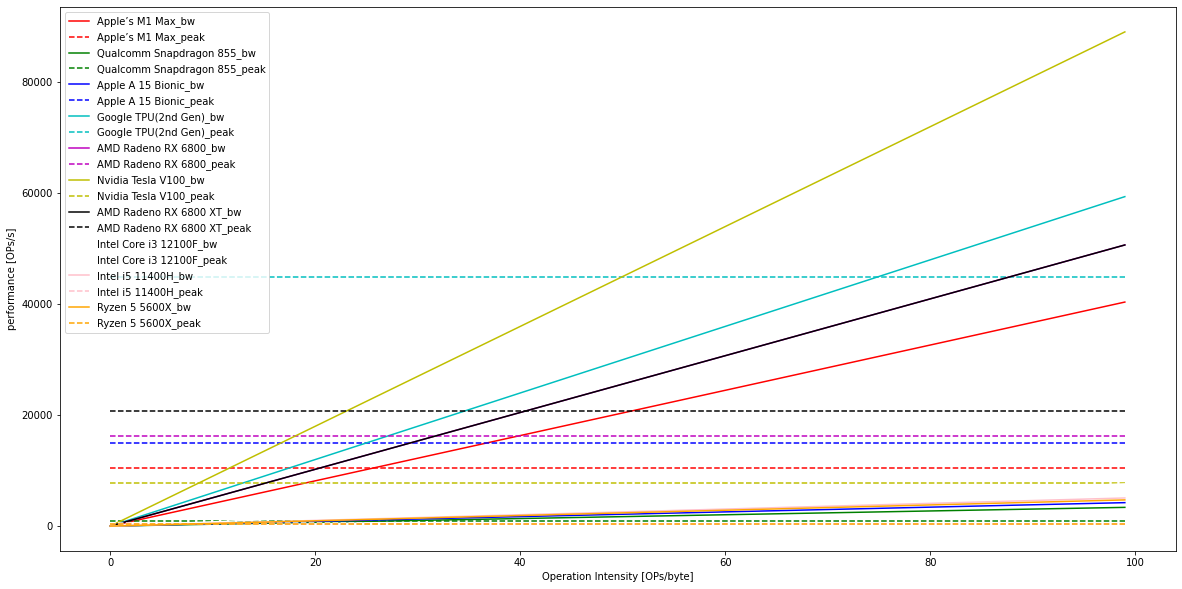

In [4]:
import matplotlib.pyplot as plt
def calc_roofline(flops, memory_bw):
    x = []
    y = []
    y1 = []
    for i in range(100):
        x.append(i)
        y.append(i * memory_bw)
        y1.append(flops)

    return x, y, y1
def plot_roofline(x_s, y_s, y1_s, names, colors):
    for i in range(len(x_s)):
        x = x_s[i]
        y = y_s[i]
        y1 = y1_s[i]
        name = names[i]
        color = colors[i]
    
        plt.plot(x, y, label = name+'_bw', color = color)
        plt.plot(x, y1, label = name+'_peak', linestyle="--", color = color)
    
    
    plt.xlabel('Operation Intensity [OPs/byte]')
    plt.ylabel('performance [OPs/s]')
    
    plt.legend()
    plt.show()
    


flops = [10400, 899, 15000, 45000, 16200, 7800, 20700, 550, 382, 441]
memory_bws = [408, 34.1, 42.7, 600, 512, 900, 512, 76.8, 51.2, 47.68]
x_s, y_s, y1_s = [], [], []
names = ['Apple’s M1 Max', 'Qualcomm Snapdragon 855', 'Apple A 15 Bionic', 
        'Google TPU(2nd Gen)', 'AMD Radeno RX 6800', 'Nvidia Tesla V100', 
        'AMD Radeno RX 6800 XT', 'Intel Core i3 12100F', 'Intel i5 11400H',
        'Ryzen 5 5600X']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'pink', 'orange']
for i, flop in enumerate(flops):
    memory_bw = memory_bws[i]
    x, y, y1 = calc_roofline(flop, memory_bw)
    x_s.append(x)
    y_s.append(y)
    y1_s.append(y1)
plt.figure(figsize=(20,10))
plot_roofline(x_s, y_s, y1_s, names, colors)